In [1]:
from PIL import Image

In [2]:
from sympy import *

In [3]:
from numpy import array

In [4]:
import numpy as np

In [5]:
from math import floor

In [6]:
imagen = Image.open('salamanquesa.jpeg')

In [7]:
def mini(imag):
    imagaux=imag
    miniatura = (120, 120)
    imagaux.thumbnail(miniatura)
    return(imagaux)

In [8]:
au=mini(imagen)

In [9]:
au.show()

In [10]:
def SimHo(imag):
    mp=imag.load()
    imagaux=Image.new("RGB",(imag.size[0]*2,imag.size[1]),"white")
    mpaux=imagaux.load()
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpaux[i,j]=mp[i,j]
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpaux[imag.size[0]+i,j]=mpaux[imag.size[0]-i-1,j]
    return(imagaux)

In [11]:
au2=SimHo(au)

In [12]:
au2.show()

In [13]:
def SimVe(imag):
    mp=imag.load()
    imagaux=Image.new("RGB",(imag.size[0],imag.size[1]*2),"white")
    mpaux=imagaux.load()
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpaux[i,j]=mp[i,j]
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpaux[i,imag.size[1]+j]=mpaux[i,imag.size[1]-j-1]
    return(imagaux)

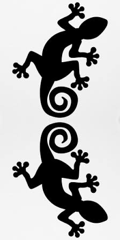

In [14]:
SimVe(au)

In [15]:
def Matrotacion(angulo):
    M=array([[cos(angulo),-sin(angulo)],[sin(angulo),cos(angulo)]])
    return(M)

In [16]:
Matrotacion(pi/4).tolist()

[[sqrt(2)/2, -sqrt(2)/2], [sqrt(2)/2, sqrt(2)/2]]

In [17]:
M=Matrotacion(pi/4)

Esta función va muy lento y encima no hace bien lo que queremos

In [18]:
def Rotacion2(imag,angulo):
    mp=imag.load()
    xmax=imag.size[0]
    ymax=imag.size[1]
    imagaux=Image.new("RGB",(imag.size[0]*2,imag.size[1]*2),"white")
    mpaux=imagaux.load()
    M=Matrotacion(angulo)
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpaux[i,j]=mp[i,j]
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            ncoord = [i-xmax/2,j-ymax/2]
            ncoord = [int(x) for x in list(M.dot(ncoord))]
            ncoord = [int(ncoord[0]+xmax/2), int(ncoord[1]+ymax/2)]
            mpaux[(ncoord[0]+xmax)%(2*xmax),ncoord[1]%(2*ymax)]=mp[i,j]
    return(imagaux)

In [19]:
aa=Rotacion2(au,pi/4)

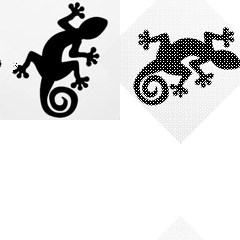

In [20]:
aa

En su lugar vamos a utilizar el método rotate.

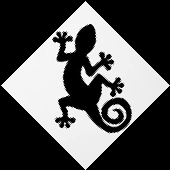

In [21]:
au.rotate(45, expand=1)

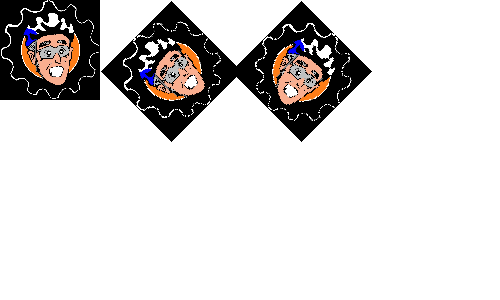

In [22]:
src_im = Image.open("bulle2.png")
angle = 45
size = 100, 100
im=src_im.resize(size)


dst_im = Image.new("RGBA", (500,300), (255,255,255,0) )
#im = src_im.convert('RGBA')
rot = im.rotate( angle, expand=1)
dst_im.paste(im, (0,0))
dst_im.paste( rot, (100,0), rot )
rot = im.rotate( -angle, expand=1)
dst_im.paste( rot, (230,0), rot )

dst_im
#dst_im.save("rotada.png")

Si quitamos de `dst_im.paste( rot, (230,0), rot )` el segundo `rot` la imagen sobreescribe sin mezclar.

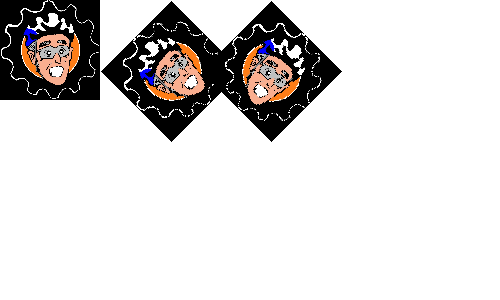

In [24]:
src_im = Image.open("bulle2.png")
angle = 45
size = 100, 100
im=src_im.resize(size)


dst_im = Image.new("RGBA", (500,300), (255,255,255,0) )
#im = src_im.convert('RGBA')
rot = im.rotate( angle, expand=1)
dst_im.paste(im, (0,0))
dst_im.paste( rot, (100,0), rot )
rot = im.rotate( -angle, expand=1)
dst_im.paste( rot, (200,0),rot)

dst_im
#dst_im.save("rotada.png")

In [38]:
def p1(imag,rang):
    im1=Image.new("RGB",(imag.size[0]*rang,imag.size[1]*rang),"white")
    for i in range(0,rang):
        for j in range(0,rang):
            im1.paste(imag, (i*imag.size[0],j*imag.size[1]))
    return(im1)

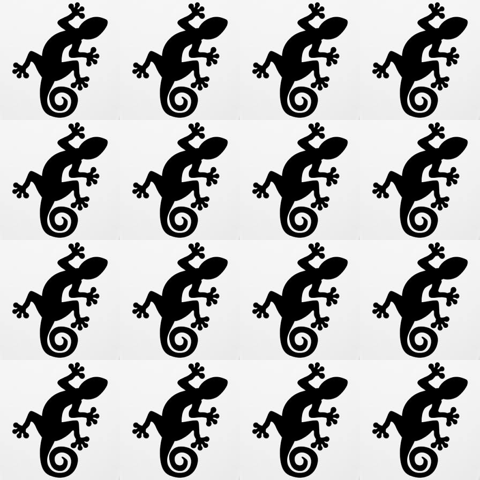

In [57]:
p1(au,4)

In [68]:
def p2(imag,rang):
    im1=Image.new("RGB",(imag.size[0]*rang*2,imag.size[1]*rang*2),"white")
    im2=Image.new("RGB",(imag.size[0],imag.size[1]*2),"white")
    rot = imag.rotate(180)#, expand=1)
    im2.paste(imag, (0,0))
    im2.paste(rot, (0,imag.size[1]))
    for i in range(0,rang*2):
        for j in range(0,rang):
            im1.paste(im2, (i*imag.size[0],j*2*imag.size[1]))
    return(im1)
    

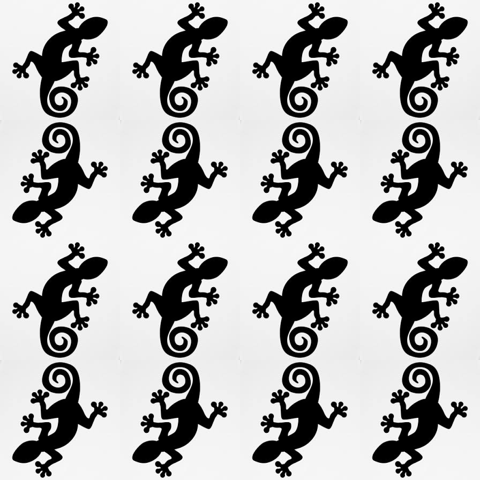

In [69]:
p2(au,2)

In [63]:
def pm(imag,rang):
    im1=Image.new("RGB",(imag.size[0]*rang*2,imag.size[1]*rang*2),"white")
    im2=SimHo(imag)
    for i in range(0,rang):
        for j in range(0,rang*2):
            im1.paste(im2, (i*2*imag.size[0],j*imag.size[1]))
    return(im1)
    

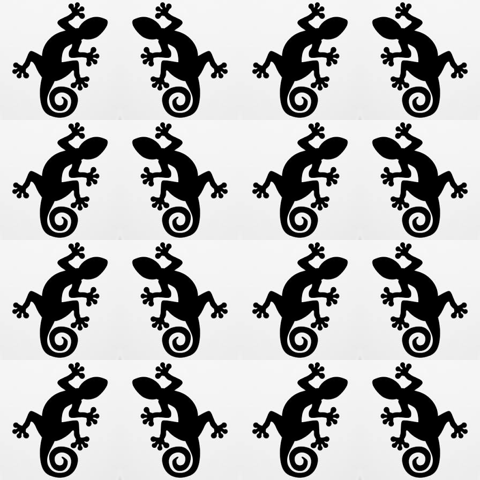

In [65]:
pm(au,2)

In [75]:
def SimHoDesliz(imag):
    mp=imag.load()
    imagaux=Image.new("RGB",(imag.size[0]*2,imag.size[1]*2),"white")
    mpaux=imagaux.load()
    imsim=Image.new("RGB",(imag.size[0],imag.size[1]),"white")
    mpsim=imsim.load()
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpsim[i,j]=mp[i,imag.size[1]-j-1]
    imagaux.paste(imag, (0,0))
    imagaux.paste(imag, (0,imag.size[1]))
    imagaux.paste(imsim, (imag.size[0],0))
    imagaux.paste(imsim, (imag.size[0],imag.size[1]))
    return(imagaux)

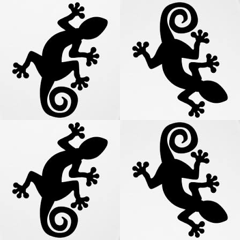

In [76]:
SimHoDesliz(au)

In [79]:
def pg(imag,rang):
    im1=Image.new("RGB",(imag.size[0]*rang*2,imag.size[1]*rang*2),"white")
    im2=SimHoDesliz(imag)
    for i in range(0,rang*2):
        for j in range(0,rang*2):
            im1.paste(im2, (i*2*imag.size[0],j*2*imag.size[1]))
    return(im1)

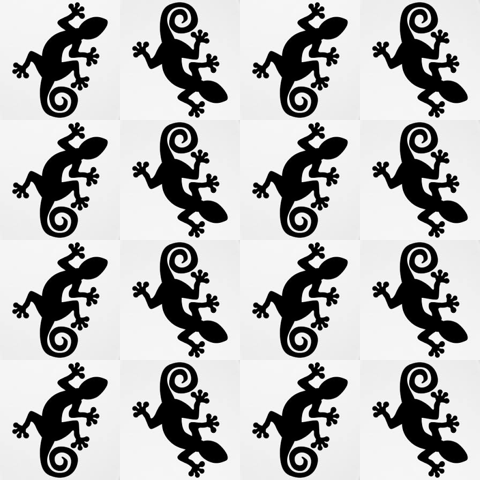

In [80]:
pg(au,2)

In [81]:
def pmm(imag,rang):
    a3=imag
    for i in range(rang):
        a1=SimHo(a3)
        a2=SimVe(a1)
        a3=a2

        i=i+1
    return(a3)

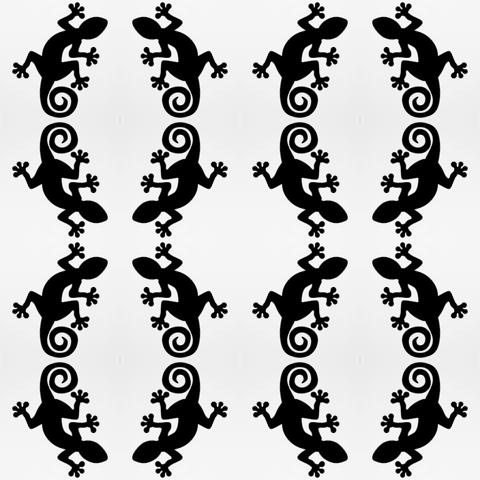

In [83]:
pmm(au,2)

In [89]:
def cm(imag,rang):
    mp=imag.load()
    imagaux=Image.new("RGB",(imag.size[0]*2,imag.size[1]*2),"white")
    im1=Image.new("RGB",(imag.size[0]*2*rang,imag.size[1]*2*rang),"white")
    mpaux=imagaux.load()
    imsim=Image.new("RGB",(imag.size[0],imag.size[1]),"white")
    mpsim=imsim.load()
    imsimV=Image.new("RGB",(imag.size[0],imag.size[1]),"white")
    mpsimV=imsimV.load()
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpsim[i,j]=mp[i,imag.size[1]-j-1]
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpsimV[i,j]=mp[imag.size[0]-i-1,j]
    rot = imag.rotate(180)
    imagaux.paste(imag, (0,0))
    imagaux.paste(imsim, (0,imag.size[1]))
    imagaux.paste(rot, (imag.size[0],0))
    imagaux.paste(imsimV, (imag.size[0],imag.size[1]))
    for i in range(0,rang*2):
        for j in range(0,rang*2):
            im1.paste(imagaux, (i*2*imag.size[0],j*2*imag.size[1]))
    return(im1)
    return(imagaux)

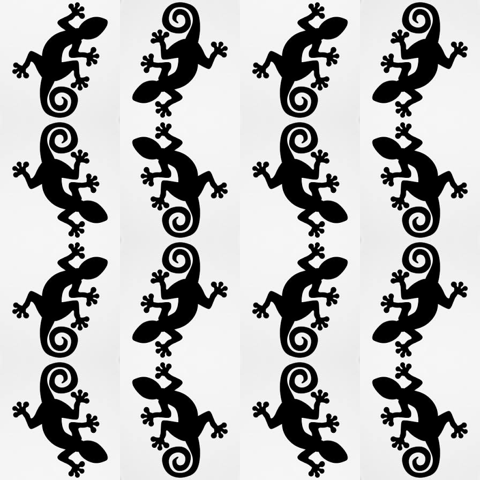

In [90]:
cm(au,2)

In [94]:
def pgg(imag,rang):
    mp=imag.load()
    imagaux=Image.new("RGB",(imag.size[0]*2,imag.size[1]*2),"white")
    im1=Image.new("RGB",(imag.size[0]*2*rang,imag.size[1]*2*rang),"white")
    mpaux=imagaux.load()
    imsim=Image.new("RGB",(imag.size[0],imag.size[1]),"white")
    mpsim=imsim.load()
    imsimV=Image.new("RGB",(imag.size[0],imag.size[1]),"white")
    mpsimV=imsimV.load()
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpsim[i,j]=mp[i,imag.size[1]-j-1]
    for i in range(imag.size[0]):
        for j in range(imag.size[1]):
            mpsimV[i,j]=mp[imag.size[0]-i-1,j]
    rot = imag.rotate(180)
    imagaux.paste(imag, (0,0))
    imagaux.paste(imsimV, (0,imag.size[1]))
    imagaux.paste(imsim, (imag.size[0],0))
    imagaux.paste(rot, (imag.size[0],imag.size[1]))
    for i in range(0,rang*2):
        for j in range(0,rang*2):
            im1.paste(imagaux, (i*2*imag.size[0],j*2*imag.size[1]))
    return(im1)
  

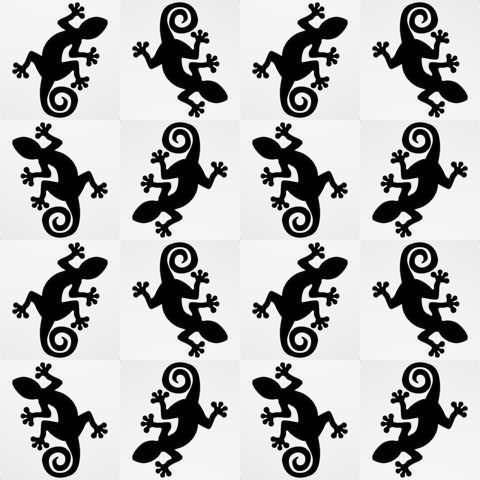

In [95]:
pgg(au,2)

In [98]:
def p4(imag,rang):
    mp=imag.load()
    imagaux=Image.new("RGB",(imag.size[0]*2,imag.size[1]*2),"white")
    im1=Image.new("RGB",(imag.size[0]*2*rang,imag.size[1]*2*rang),"white")
    mpaux=imagaux.load()
    rot1 = imag.rotate(270)
    rot2 = imag.rotate(180)
    rot3 = rot1.rotate(180)
    imagaux.paste(imag, (0,0))
    imagaux.paste(rot3, (0,imag.size[1]))
    imagaux.paste(rot1, (imag.size[0],0))
    imagaux.paste(rot2, (imag.size[0],imag.size[1]))
    for i in range(0,rang*2):
        for j in range(0,rang*2):
            im1.paste(imagaux, (i*2*imag.size[0],j*2*imag.size[1]))
    return(im1)


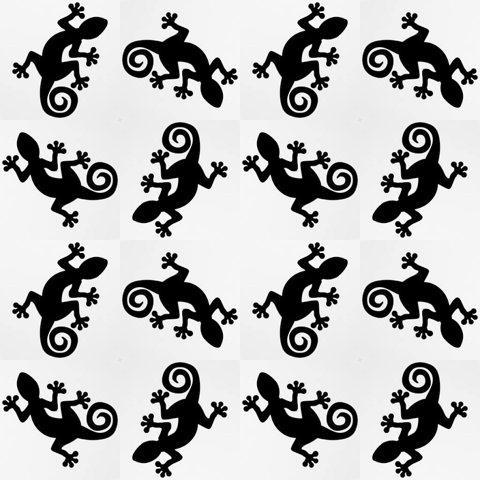

In [99]:
p4(au,2)